In [1]:
import os

import tools.config as config
import pandas as pd
import matplotlib.pyplot as plt
from tools.helper_plot import set_plot_style,xarray_to_dict, get_global_ylim, plot_origin_layout,get_colors

def process_dict(data_dict):
    for k, df in data_dict.items():
        # 先移除名为 'Transition(ag2non→ag) cost' 的列（如果存在）
        if 'Transition(ag→non-ag) cost' in df.columns:
            df = df.drop(columns=['Transition(ag→non-ag) cost'])
        # 找到所有列名包含 "cost" 的列
        cost_cols = [col for col in df.columns if "cost" in col]
        # 将这些列取负值
        df[cost_cols] = df[cost_cols] * -1
        # 新建 Total 列，为每行所有列的和
        df['Total'] = df.sum(axis=1)
        # 更新字典
        data_dict[k] = df
    return data_dict

# Main script
set_plot_style(font_size=24, font_family='Arial')

# task_name = config.TASK_NAME
task_name = '20250922_Paper2_Results_HPC_test'
input_dir = f'../../../output/{task_name }/carbon_price/1_draw_data'
output_dir = f"../../../output/{task_name }/carbon_price/3_Paper_figure"

data_dict = xarray_to_dict(f"{input_dir}/xr_cost_for_profit.nc",1e3)
data_dict = process_dict(data_dict)
summary_ylim = get_global_ylim(data_dict)

In [6]:
data_dict, colors = get_colors(data_dict,'tools/land use colors.xlsx',sheet_name='cost_revenue')

In [3]:
data_dict['Run_13_GHG_off_BIO_off_CUT_50'].columns

Index(['Ag cost', 'Agmgt cost', 'Non-ag cost', 'Transition(ag→ag) cost',
       'Transition(ag→non-ag) amortised cost', 'Ag revenue', 'Agmgt revenue',
       'Non-ag revenue'],
      dtype='object')

In [7]:
colors

{'Ag cost': '#fab431',
 'Agmgt cost': '#ec7951',
 'Non-ag cost': '#cd4975',
 'Transition(ag→ag) cost': '#9f0e9e',
 'Transition(ag→non-ag) amortised cost': '#6200ac',
 'Ag revenue': '#2d688f',
 'Agmgt revenue': '#19928e',
 'Non-ag revenue': '#35b876'}

N:\LUF-Modelling\LUTO2_XH\LUTO2\myCode\carbonprice\code\tools\helper_plot.py:421: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


✅ Saved to ../../../output/20250922_Paper2_Results_HPC_test/carbon_price/3_Paper_figure\03_Profit.png


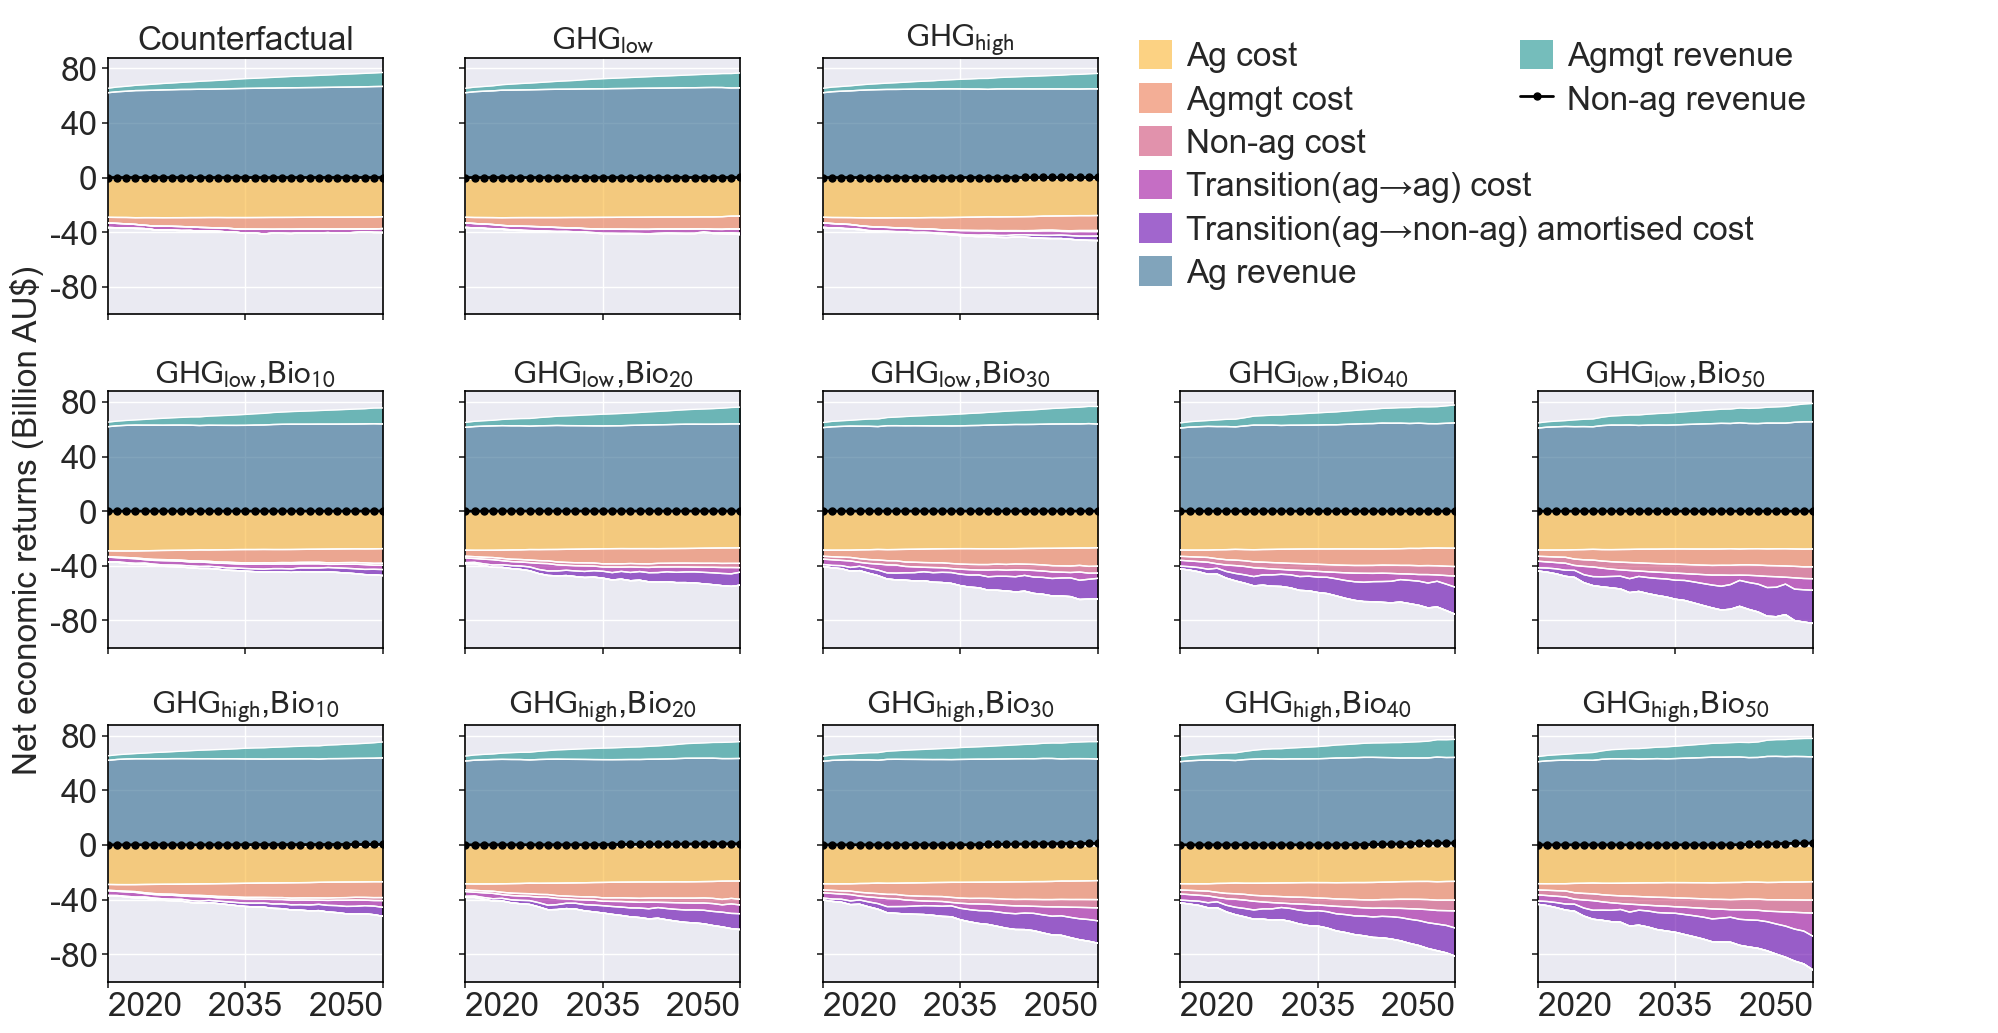

In [8]:

output_path = os.path.join(output_dir, '03_Profit.png')
plot_origin_layout(data_dict,config.ORIGINAL_TITLE_MAP,colors,output_path,summary_ylim,bbox_to_anchor=[0.58, 0.82, 0.4, 0.1],dividing_line=1)